# Without ML Pipelines

In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [495]:
url='https://raw.githubusercontent.com/ishworrsubedii/Machine_Learning_From_Basic/main/Day-6/Data/Titanic-Dataset.csv'
titanic_dataset=pd.read_csv(url)

In [496]:
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [497]:
titanic_dataset.shape

(891, 12)

In [498]:
titanic_dataset.duplicated().sum()

0

In [499]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Imputer for Age column

In [500]:
si=SimpleImputer(strategy='mean')
titanic_dataset.Age=si.fit_transform(titanic_dataset.Age.values.reshape(-1,1))

In [501]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [502]:
x=titanic_dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=titanic_dataset['Survived']

#### Label Encoder For Output Column

In [503]:
x=x.dropna(subset=['Embarked'])

In [504]:
x.shape

(889, 7)

In [505]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [506]:
x.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [507]:
# Lets use Label encoder for y dataset
le=LabelEncoder()
y_train=le.fit_transform(y)

### One Hot Encoding For Sex and Embarked Columns

In [508]:
x.sample(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
492,1,male,55.0,0,0,30.5000,S
496,1,female,54.0,1,0,78.2667,C


In [509]:
x_age=x.Age.values.reshape(-1,1)
x_pclass=x.Pclass.values.reshape(-1,1)
x_parch=x.Parch.values.reshape(-1,1)
x_sibsp=x.SibSp.values.reshape(-1,1)
x_fare=x.Fare.values.reshape(-1,1)


In [510]:
one_hotfor_sex=OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')
one_hotfor_embarked=OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first')

x_embarked=one_hotfor_embarked.fit_transform(x.Embarked.values.reshape(-1,1))
x_sex=one_hotfor_sex.fit_transform(x.Sex.values.reshape(-1,1))

C:\Users\ACER\anaconda3\envs\machinelearning\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ACER\anaconda3\envs\machinelearning\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [511]:
x_embarked

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [512]:
X_train_final=np.concatenate((x_pclass,x_sex,x_age,x_sibsp,x_parch,x_fare,x_embarked),axis=1)

In [513]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [514]:
X_train_final.shape

(889, 8)

# Using ML Pipelines

In [515]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [516]:
titanic_data=pd.read_csv(url)

C:\Users\ACER\AppData\Local\Temp\ipykernel_7088\2085922743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=titanic_data.corr()


<AxesSubplot: >

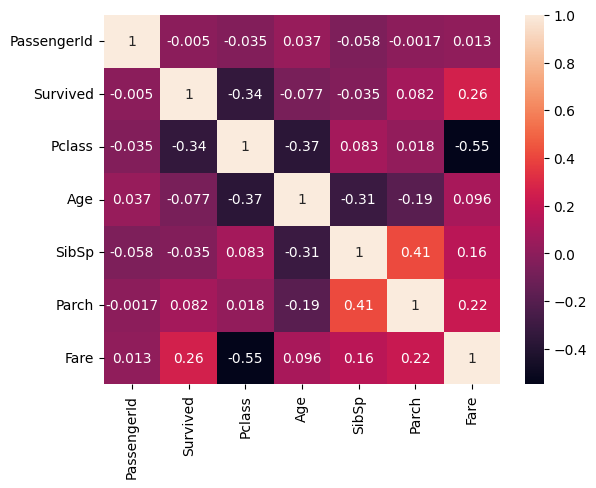

In [561]:
cor=titanic_data.corr()
sns.heatmap(cor,annot=True)

In [559]:
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [517]:
X_train=titanic_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Y_train=titanic_data['Survived']

In [518]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [519]:
X=x
le=LabelEncoder()
Y=le.fit_transform(y)

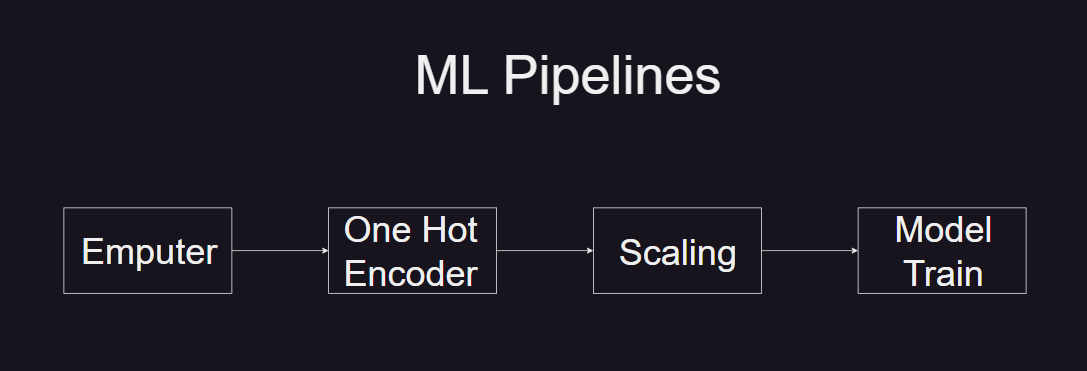

In [520]:
X_train.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
360,3,male,40.0,1,4,27.9000,S
29,3,male,NaN,0,0,7.8958,S
478,3,male,22.0,0,0,7.5208,S
702,3,female,18.0,0,1,14.4542,C
251,3,female,29.0,1,1,10.4625,S
393,1,female,23.0,1,0,113.2750,C
452,1,male,30.0,0,0,27.7500,C
241,3,female,NaN,1,0,15.5000,Q
586,2,male,47.0,0,0,15.0000,S
409,3,female,NaN,3,1,25.4667,S


In [521]:
trf1 = ColumnTransformer([
    ('ageimpute',SimpleImputer(),[2]),
    ('embarkedimpute',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

trf2 = ColumnTransformer([
    ('onehotencoded',OneHotEncoder(sparse=False,handle_unknown='ignore',drop='first'),[1,6])
],remainder='passthrough')
trf3 = ColumnTransformer([
    ('zscore',StandardScaler(),slice(0,6))
])

trf4 = LogisticRegression()


In [522]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [551]:

x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=10,test_size=0.1)

In [552]:
pipe.fit(x_train,y_train)


C:\Users\ACER\anaconda3\envs\machinelearning\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ageimpute', SimpleImputer(),
                                                  [2]),
                                                 ('embarkedimpute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoded',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('zscore', StandardScaler(),
                                                  slice(0, 6, None))])),
                ('trf4', LogisticRegression())])

In [553]:
y_pred=pipe.predict(x_test)

C:\Users\ACER\anaconda3\envs\machinelearning\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [554]:
accuracy_score(y_test,y_pred)

0.7